# NFL Data cleaning Exercise - 2 

In [124]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [125]:
# install ipynb

!pip install ipynb --user

In [126]:
nfl2 = pd.read_csv('NFL Play by Play 2009-2016 (v3).csv')

In [127]:
nfl2.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,10-09-2009,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,10-09-2009,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,10-09-2009,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,10-09-2009,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,10-09-2009,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [128]:
nfl2.isnull().any()

Date        False
GameID      False
Drive       False
qtr         False
down         True
            ...  
Win_Prob     True
WPA          True
airWPA       True
yacWPA       True
Season      False
Length: 102, dtype: bool

In [129]:
nfl2.isnull().sum()

Date             0
GameID           0
Drive            0
qtr              0
down         54218
             ...  
Win_Prob     21993
WPA           4817
airWPA      220738
yacWPA      220956
Season           0
Length: 102, dtype: int64

In [130]:
nfl2.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,3.624470e+05,362447.000000,362447.000000,308229.000000,362447.000000,362259.000000,362073.000000,361724.000000,361724.000000,362447.000000,...,141713.000000,340504.000000,340504.000000,339087.000000,339087.000000,340454.000000,357630.000000,141709.000000,141491.000000,362447.000000
mean,2.012664e+09,12.347088,2.578231,2.001226,7.386076,1695.234346,20.574649,28.413542,48.616807,7.305236,...,-0.386522,0.533889,0.466561,0.534217,0.466185,0.501311,0.002163,0.015209,-0.010492,2012.522071
std,2.292258e+06,7.168173,1.130259,1.006003,4.642132,1063.065717,18.030486,13.002355,25.161965,4.863445,...,1.972964,0.286415,0.286468,0.288647,0.288694,0.288207,0.045326,0.056422,0.067972,2.290084
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,0.000000,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997214,-0.999881,-0.986673,2009.000000
25%,2.011091e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000,20.000000,30.000000,3.000000,...,-0.964562,0.323129,0.230595,0.319464,0.226867,0.274964,-0.014589,-0.011355,-0.018623,2011.000000
50%,2.013091e+09,12.000000,3.000000,2.000000,7.000000,1800.000000,17.000000,30.000000,49.000000,9.000000,...,0.000000,0.531286,0.469040,0.533689,0.466617,0.504349,0.000000,0.003557,0.000000,2013.000000
75%,2.015091e+09,18.000000,4.000000,3.000000,11.000000,2585.000000,37.000000,39.000000,70.000000,10.000000,...,0.484913,0.770011,0.677566,0.773729,0.681018,0.726995,0.014800,0.035702,0.011371,2015.000000
max,2.017010e+09,35.000000,5.000000,4.000000,15.000000,3600.000000,943.000000,50.000000,99.000000,50.000000,...,9.559834,1.000000,1.000000,1.000000,1.000000,1.000000,0.994848,0.994848,1.000000,2016.000000


In [131]:
nfl2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 282.1+ MB


In [132]:
def nullPercent(data):
    null_percent = (data.isnull().sum()/data.shape[0])*100
    
    total_cells = np.product(data.shape)
    missing_values = data.isnull().sum()
    total_missing = missing_values.sum()
    
    percent_missing = (total_missing/total_cells)*100
    print(percent_missing)

In [133]:
nullPercent(nfl2)

24.85847694188906


In [134]:
nfl2.drop_duplicates()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,10-09-2009,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,10-09-2009,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,10-09-2009,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,10-09-2009,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,10-09-2009,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362442,01-01-2017,2017010102,20,4,1.0,0:22,1,22.0,6.0,GB,...,0.000000,0.051901,0.948099,0.093435,0.906565,0.051901,0.041534,0.041534,0.000000,2016
362443,01-01-2017,2017010102,20,4,NaN,0:13,1,13.0,9.0,GB,...,NaN,0.093435,0.906565,0.034069,0.965931,0.093435,-0.059366,NaN,NaN,2016
362444,01-01-2017,2017010102,21,4,NaN,0:13,1,13.0,0.0,DET,...,NaN,0.034069,0.965931,0.035708,0.964292,0.965931,-0.001639,NaN,NaN,2016
362445,01-01-2017,2017010102,21,4,1.0,0:12,1,12.0,1.0,DET,...,NaN,0.035708,0.964292,0.000000,1.000000,0.964292,0.035708,NaN,NaN,2016


In [135]:
nfl2.drop(['GameID'], axis=1)

,Date,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,10-09-2009,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,10-09-2009,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,10-09-2009,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,10-09-2009,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,10-09-2009,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362442,01-01-2017,20,4,1.0,0:22,1,22.0,6.0,GB,35.0,...,0.000000,0.051901,0.948099,0.093435,0.906565,0.051901,0.041534,0.041534,0.000000,2016
362443,01-01-2017,20,4,NaN,0:13,1,13.0,9.0,GB,15.0,...,NaN,0.093435,0.906565,0.034069,0.965931,0.093435,-0.059366,NaN,NaN,2016
362444,01-01-2017,21,4,NaN,0:13,1,13.0,0.0,DET,35.0,...,NaN,0.034069,0.965931,0.035708,0.964292,0.965931,-0.001639,NaN,NaN,2016
362445,01-01-2017,21,4,1.0,0:12,1,12.0,1.0,DET,46.0,...,NaN,0.035708,0.964292,0.000000,1.000000,0.964292,0.035708,NaN,NaN,2016


In [136]:
nfl2.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,10-09-2009,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,10-09-2009,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,10-09-2009,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,10-09-2009,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,10-09-2009,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


# Filling Categorical Values

In [137]:
nfl2['down'].unique()

array([nan,  1.,  2.,  3.,  4.])

In [138]:
nfl2['down'].value_counts()

1.0    123682
2.0     92586
3.0     59862
4.0     32099
Name: down, dtype: int64

In [139]:
nfl2['down'].isnull().sum()

54218

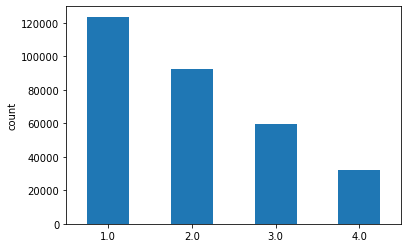

In [140]:
nfl2['down'].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')
plt.show()

In [141]:
# We 

In [142]:
missing_categorical = [var for var in nfl2.columns if nfl2[var].isnull().mean()>0 and nfl2[var].dtype == 'float64']

In [143]:
missing_categorical

['down',
 'TimeSecs',
 'PlayTimeDiff',
 'yrdln',
 'yrdline100',
 'GoalToGo',
 'FirstDown',
 'FieldGoalDistance',
 'PosTeamScore',
 'DefTeamScore',
 'ScoreDiff',
 'AbsScoreDiff',
 'No_Score_Prob',
 'Opp_Field_Goal_Prob',
 'Opp_Safety_Prob',
 'Opp_Touchdown_Prob',
 'Field_Goal_Prob',
 'Safety_Prob',
 'Touchdown_Prob',
 'ExpPts',
 'EPA',
 'airEPA',
 'yacEPA',
 'Home_WP_pre',
 'Away_WP_pre',
 'Home_WP_post',
 'Away_WP_post',
 'Win_Prob',
 'WPA',
 'airWPA',
 'yacWPA']

In [144]:
nfl2['down'].isnull().mean()

0.14958876746117364

In [145]:
nfl2['down'].mode()

0    1.0
dtype: float64

In [146]:
nfl2['down'].fillna(1.0,inplace=True)

In [147]:
nfl2['down'].isnull().sum()

0

In [148]:
nfl2['down'].value_counts()

1.0    177900
2.0     92586
3.0     59862
4.0     32099
Name: down, dtype: int64

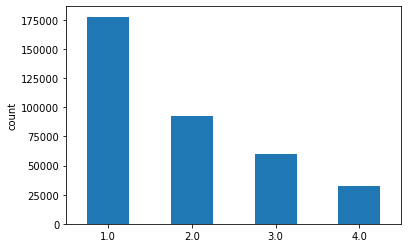

In [149]:
nfl2['down'].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')
plt.show()

In [150]:
import os
import ipynb
from ipynb.fs.full.PipeLine_Functions import Mean_Imputer,Mode_Imputer,Median_Imputer
from ipynb.fs.full.CommonFile import Mean_Median_Mode

In [151]:
Mean_Imputer(nfl2['TimeSecs'])

0


In [152]:
nfl2['PlayTimeDiff'].unique()

array([  0.,   7.,  37.,  41.,   8.,  11.,  36.,  29.,  10.,  27.,  38.,
        42.,   5.,  23.,  33.,   4.,  35.,  25.,  13.,  22.,  20.,  39.,
        45.,   6.,  31.,   9.,  44.,  40.,  46.,  24.,  15.,   1.,  34.,
        43.,  19.,   3.,  26.,  32.,  62.,   2.,  12.,  71.,  30.,  50.,
        47.,  14.,  16.,  54.,  51.,  28.,  18.,  17.,  49.,  21.,  48.,
        82.,  68.,  89.,  84.,  57.,  92.,  73.,  53.,  59.,  52.,  70.,
        97.,  58.,  56., 146., 188.,  60.,  nan,  65.,  95.,  67.,  63.,
        55., 177., 198., 160., 122.,  96.,  72.,  66.,  69.,  85.,  77.,
        86.,  79.,  64.,  98.,  83.,  78.,  61.,  81.,  75., 112., 105.,
        74.,  76., 234., 115., 102., 100., 900., 908., 145.,  88., 106.,
       117., 113.,  80.,  87., 927., 144.,  90., 103., 120., 110., 116.,
       109., 322., 282., 704., 699., 690., 647., 646., 609., 645., 635.,
       629., 452., 409., 355., 351., 379., 193., 143., 195.,  93., 147.,
        91., 150., 896., 904., 909.,  94., 371., 25

In [153]:
nfl2['PlayTimeDiff'].isnull().sum()

374

In [154]:
nfl2['PlayTimeDiff'].value_counts()

0.0      47470
5.0      25956
6.0      20863
4.0      18329
7.0      15633
         ...  
646.0        1
609.0        1
645.0        1
635.0        1
880.0        1
Name: PlayTimeDiff, Length: 155, dtype: int64

In [155]:
nfl2['PlayTimeDiff'].mean()

20.574649311050536

In [156]:
Mean_Imputer(nfl2['PlayTimeDiff'])

0


In [157]:
for data in range(len(missing_categorical)):
    category = missing_categorical[data]
    print(category)
    print(nfl2[category].unique())

down
[1. 2. 3. 4.]
TimeSecs
[3600. 3593. 3556. ... -741. -401. -672.]
PlayTimeDiff
[  0.           7.          37.          41.           8.
  11.          36.          29.          10.          27.
  38.          42.           5.          23.          33.
   4.          35.          25.          13.          22.
  20.          39.          45.           6.          31.
   9.          44.          40.          46.          24.
  15.           1.          34.          43.          19.
   3.          26.          32.          62.           2.
  12.          71.          30.          50.          47.
  14.          16.          54.          51.          28.
  18.          17.          49.          21.          48.
  82.          68.          89.          84.          57.
  92.          73.          53.          59.          52.
  70.          97.          58.          56.         146.
 188.          60.          20.57464931  65.          95.
  67.          63.          55.         177.   

In [158]:
nfl2['AbsScoreDiff'].mean()

7.830318952666302

In [159]:
for data in range(len(missing_categorical)):
    category = missing_categorical[data]
    print(category)
    print(nfl2[category].isnull().sum())

down
0
TimeSecs
0
PlayTimeDiff
0
yrdln
723
yrdline100
723
GoalToGo
723
FirstDown
25597
FieldGoalDistance
354528
PosTeamScore
23682
DefTeamScore
23682
ScoreDiff
21975
AbsScoreDiff
23682
No_Score_Prob
148
Opp_Field_Goal_Prob
148
Opp_Safety_Prob
148
Opp_Touchdown_Prob
148
Field_Goal_Prob
148
Safety_Prob
148
Touchdown_Prob
148
ExpPts
148
EPA
322
airEPA
220641
yacEPA
220734
Home_WP_pre
21943
Away_WP_pre
21943
Home_WP_post
23360
Away_WP_post
23360
Win_Prob
21993
WPA
4817
airWPA
220738
yacWPA
220956


In [160]:
for data in range(len(missing_categorical)):
    category = missing_categorical[data]
    print(category)
    print(nfl2[category].isnull().sum())
    if(nfl2[category].isnull().sum() > 10000):
        Median_Imputer(nfl2[category])
        print(nfl2[category].isnull().sum())
    else:
        Mean_Imputer(nfl2[category])
        print(nfl2[category].isnull().sum())

down
0
0
0
TimeSecs
0
0
0
PlayTimeDiff
0
0
0
yrdln
723
0
0
yrdline100
723
0
0
GoalToGo
723
0
0
FirstDown
25597
0
0
FieldGoalDistance
354528
0
0
PosTeamScore
23682
0
0
DefTeamScore
23682
0
0
ScoreDiff
21975
0
0
AbsScoreDiff
23682
0
0
No_Score_Prob
148
0
0
Opp_Field_Goal_Prob
148
0
0
Opp_Safety_Prob
148
0
0
Opp_Touchdown_Prob
148
0
0
Field_Goal_Prob
148
0
0
Safety_Prob
148
0
0
Touchdown_Prob
148
0
0
ExpPts
148
0
0
EPA
322
0
0
airEPA
220641
0
0
yacEPA
220734
0
0
Home_WP_pre
21943
0
0
Away_WP_pre
21943
0
0
Home_WP_post
23360
0
0
Away_WP_post
23360
0
0
Win_Prob
21993
0
0
WPA
4817
0
0
airWPA
220738
0
0
yacWPA
220956
0
0


In [161]:
missing_columns = [var for var in nfl2.columns if nfl2[var].isnull().mean()>0]
missing_columns

['time',
 'SideofField',
 'posteam',
 'DefensiveTeam',
 'desc',
 'ExPointResult',
 'TwoPointConv',
 'DefTwoPoint',
 'PuntResult',
 'Passer',
 'PassOutcome',
 'PassLength',
 'PassLocation',
 'Interceptor',
 'Rusher',
 'RunLocation',
 'RunGap',
 'Receiver',
 'ReturnResult',
 'Returner',
 'BlockingPlayer',
 'Tackler1',
 'Tackler2',
 'FieldGoalResult',
 'RecFumbTeam',
 'RecFumbPlayer',
 'ChalReplayResult',
 'PenalizedTeam',
 'PenaltyType',
 'PenalizedPlayer']

In [162]:
for data in range(len(missing_columns)):
    category = missing_columns[data]
    print(category)
    print(nfl2[category].dtype)
    print(nfl2[category].isnull().sum())
    print(nfl2[category].unique())
    print("---------------")

time
object
188
['15:00' '14:53' '14:16' '13:35' '13:27' '13:16' '12:40' '12:11' '11:34'
 '11:24' '10:48' '10:21' '9:43' '9:01' '8:25' '8:20' '7:57' '7:24' '6:57'
 '6:52' '6:48' '6:44' '6:09' '5:27' '5:02' '4:49' '4:27' '4:07' '3:45'
 '3:06' '2:28' '1:51' '1:38' '0:57' '0:12' '0:06' '0:00' '14:22' '13:49'
 '13:44' '13:13' '13:04' '12:23' '11:39' '10:59' '10:19' '9:54' '8:59'
 '8:18' '7:32' '7:25' '7:14' '7:07' '6:31' '5:54' '5:19' '5:11' '4:46'
 '4:40' '4:01' '3:37' '3:04' '2:22' '2:14' '2:08' '2:00' '1:29' '1:22'
 '1:15' '1:09' '0:54' '0:53' '0:48' '0:41' '0:35' '0:27' '0:21' '0:16'
 '0:07' '0:01' '14:55' '14:20' '13:38' '12:41' '12:06' '11:57' '11:20'
 '10:37' '10:12' '9:53' '9:11' '8:46' '8:09' '8:01' '7:58' '7:15' '6:49'
 '6:06' '5:23' '5:18' '5:08' '4:29' '3:48' '3:12' '2:36' '2:30' '2:01'
 '1:56' '1:43' '1:08' '0:25' '14:51' '14:28' '13:47' '13:10' '12:34'
 '11:48' '11:08' '11:03' '10:54' '10:17' '9:33' '8:17' '6:34' '5:56'
 '5:10' '4:28' '3:46' '3:02' '3:00' '2:57' '2:50' '2:12'

---------------
PassLength
object
213772
[nan 'Short' 'Deep' '20']
---------------
PassLocation
object
213772
[nan 'left' 'right' 'middle']
---------------
Interceptor
object
358387
[nan 'T.Polamalu' 'V.Fuller' 'C.Finnegan' 'C.Griffin' 'A.Henry'
 'D.Sharper' 'S.Shanle' 'M.Jenkins' 'J.Busing' 'L.Sheppard' 'D.Cox'
 'W.Woodyard' 'T.Scheffler' 'S.Brown' 'J.Beason' 'A.Jordan' 'A.Samuel'
 'J.Hanson' 'D.Johnson' 'M.Peterson' 'P.Willis' 'N.Clements' 'J.Butler'
 'O.Atogwe' 'C.Webster' 'D.Hall' 'N.Collins' 'J.Jolly' 'T.Williams'
 'A.Harris' 'A.Schobel' 'Q.Jammer' 'M.Huff' 'A.Cason' 'R.Marshall'
 'C.Houston' 'C.Greenway' 'E.Wilson' 'T.Porter' 'D.Revis'
 'D.Rodgers-Cromartie' 'C.Woodson' 'D.Goldson' 'D.Whitner' 'B.Scott'
 'S.Piscitelli' 'D.Landry' 'A.Barnes' 'D.McBath' 'C.Tillman' 'B.Johnson'
 'K.Phillips' 'G.Wilson' 'A.Bethea' 'D.Foxworth' 'B.Ayanbadejo' 'E.Reed'
 'E.Smith' 'C.Hope' 'D.Harris' 'K.Simpson' 'R.Mathis' 'S.Spencer'
 'T.Thomas' 'W.Smith' 'D.Hawthorne' 'L.Briggs' 'J.Joseph' 'E.Weddle'


[nan 'right' 'middle' 'left']
---------------
RunGap
object
284605
[nan 'end' 'guard' 'tackle']
---------------
Receiver
object
218647
[nan 'H.Ward' 'M.Wallace' ... 'C.Reynolds' 'D.Smelter' 'J.McKissic']
---------------
ReturnResult
object
346547
[nan 'Fair Catch' 'Touchback' 'Touchdown']
---------------
Returner
object
339535
['S.Logan' nan 'C.Finnegan' 'J.Ringer' 'A.Elam' 'P.Harvin' 'J.Cribbs'
 'D.Reynaud' 'S.Rice' 'R.Meachem' 'R.Bush' 'A.Brown' 'D.Bing' 'F.Jones'
 'C.Smith' 'P.Crayton' 'J.Jones' 'L.Washington' 'J.Leonhard' 'T.Rushing'
 'C.Simpson' 'B.Witherspoon' 'Q.Cosby' 'E.Royal' 'A.Caldwell' 'M.Goodson'
 'E.Hobbs' 'D.Jackson' 'C.Munnerlyn' 'J.Charles' 'C.Carr' 'Q.Lawrence'
 'E.Reed' 'M.Leggett' 'D.Edwards' 'B.Engram' 'A.Studebaker' 'E.Weems'
 'D.Bess' 'T.Ginn' 'P.Cobbs' 'B.Finneran' 'A.Rossum' 'A.Rolle'
 'L.Stephens-Howling' 'D.Avery' 'N.Burleson' 'D.Stanley' 'J.Forsett'
 'S.Gado' 'J.Wilson' 'D.Ware' 'M.Sellers' 'D.Hixon' 'R.Cartwright'
 'M.Hedgecock' 'S.Moss' 'H.Nicks' 'L.Betts

['M.Griffin' 'C.Hope' 'S.Tulloch' ... 'T.Gurley' 'K.Peko' 'C.Kaepernick']
---------------
Tackler2
object
318045
[nan 'J.Farrior' 'S.Tulloch' ... 'D.Carrier' 'L.Trail' 'D.Lowry']
---------------
FieldGoalResult
object
354431
[nan 'No Good' 'Blocked' 'Good']
---------------
RecFumbTeam
object
358513
[nan 'PIT' 'TEN' 'MIN' 'DET' 'TB' 'NYJ' 'HOU' 'JAC' 'PHI' 'CAR' 'BAL' 'KC'
 'ATL' 'ARI' 'SEA' 'STL' 'NYG' 'WAS' 'BUF' 'NE' 'OAK' 'SD' 'NO' 'GB' 'CIN'
 'SF' 'CLE' 'DEN' 'CHI' 'MIA' 'IND' 'DAL' 'LA']
---------------
RecFumbPlayer
object
358513
[nan 'K.Fox' 'S.Tulloch' ... 'M.Paradis' 'A.Gotsis' 'F.Clark']
---------------
ChalReplayResult
object
359476
[nan 'Upheld' 'Reversed']
---------------
PenalizedTeam
object
336362
[nan 'PIT' 'TEN' 'CLE' 'MIN' 'NO' 'DET' 'TB' 'DAL' 'HOU' 'NYJ' 'JAC' 'IND'
 'CIN' 'DEN' 'PHI' 'CAR' 'BAL' 'KC' 'MIA' 'ATL' 'SF' 'ARI' 'STL' 'SEA'
 'WAS' 'NYG' 'GB' 'CHI' 'BUF' 'NE' 'SD' 'OAK' 'LA']
---------------
PenaltyType
object
347849
[nan 'Illegal Formation' 'Encroachment

In [163]:
nfl2 = nfl2.drop(['desc'], axis = 1)

In [164]:
nfl2 = nfl2.drop(['PenaltyType'], axis = 1)

In [165]:
nfl2.columns

Index(['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder',
       'TimeSecs', 'PlayTimeDiff', 'SideofField', 'yrdln', 'yrdline100',
       'ydstogo', 'ydsnet', 'GoalToGo', 'FirstDown', 'posteam',
       'DefensiveTeam', 'PlayAttempted', 'Yards.Gained', 'sp', 'Touchdown',
       'ExPointResult', 'TwoPointConv', 'DefTwoPoint', 'Safety', 'Onsidekick',
       'PuntResult', 'PlayType', 'Passer', 'Passer_ID', 'PassAttempt',
       'PassOutcome', 'PassLength', 'AirYards', 'YardsAfterCatch', 'QBHit',
       'PassLocation', 'InterceptionThrown', 'Interceptor', 'Rusher',
       'Rusher_ID', 'RushAttempt', 'RunLocation', 'RunGap', 'Receiver',
       'Receiver_ID', 'Reception', 'ReturnResult', 'Returner',
       'BlockingPlayer', 'Tackler1', 'Tackler2', 'FieldGoalResult',
       'FieldGoalDistance', 'Fumble', 'RecFumbTeam', 'RecFumbPlayer', 'Sack',
       'Challenge.Replay', 'ChalReplayResult', 'Accepted.Penalty',
       'PenalizedTeam', 'PenalizedPlayer', 'Penalty.Yards', 'PosTeamScore

In [166]:
drop_columns = [var for var in nfl2.columns if nfl2[var].isnull().sum()>35000]
drop_columns

['ExPointResult',
 'TwoPointConv',
 'DefTwoPoint',
 'PuntResult',
 'Passer',
 'PassOutcome',
 'PassLength',
 'PassLocation',
 'Interceptor',
 'Rusher',
 'RunLocation',
 'RunGap',
 'Receiver',
 'ReturnResult',
 'Returner',
 'BlockingPlayer',
 'Tackler1',
 'Tackler2',
 'FieldGoalResult',
 'RecFumbTeam',
 'RecFumbPlayer',
 'ChalReplayResult',
 'PenalizedTeam',
 'PenalizedPlayer']

In [167]:
for col in range(len(drop_columns)):
    nfl2.drop(drop_columns[col], inplace=True, axis=1)

In [168]:
missing_columns1 = [var for var in nfl2.columns if nfl2[var].isnull().mean()>0]
for data1 in range(len(missing_columns1)):
    category1 = missing_columns1[data1]
    print(category1)
    print(nfl2[category1].dtype)
    print(nfl2[category1].isnull().sum())
    print(nfl2[category1].unique())
    print("---------------")

time
object
188
['15:00' '14:53' '14:16' '13:35' '13:27' '13:16' '12:40' '12:11' '11:34'
 '11:24' '10:48' '10:21' '9:43' '9:01' '8:25' '8:20' '7:57' '7:24' '6:57'
 '6:52' '6:48' '6:44' '6:09' '5:27' '5:02' '4:49' '4:27' '4:07' '3:45'
 '3:06' '2:28' '1:51' '1:38' '0:57' '0:12' '0:06' '0:00' '14:22' '13:49'
 '13:44' '13:13' '13:04' '12:23' '11:39' '10:59' '10:19' '9:54' '8:59'
 '8:18' '7:32' '7:25' '7:14' '7:07' '6:31' '5:54' '5:19' '5:11' '4:46'
 '4:40' '4:01' '3:37' '3:04' '2:22' '2:14' '2:08' '2:00' '1:29' '1:22'
 '1:15' '1:09' '0:54' '0:53' '0:48' '0:41' '0:35' '0:27' '0:21' '0:16'
 '0:07' '0:01' '14:55' '14:20' '13:38' '12:41' '12:06' '11:57' '11:20'
 '10:37' '10:12' '9:53' '9:11' '8:46' '8:09' '8:01' '7:58' '7:15' '6:49'
 '6:06' '5:23' '5:18' '5:08' '4:29' '3:48' '3:12' '2:36' '2:30' '2:01'
 '1:56' '1:43' '1:08' '0:25' '14:51' '14:28' '13:47' '13:10' '12:34'
 '11:48' '11:08' '11:03' '10:54' '10:17' '9:33' '8:17' '6:34' '5:56'
 '5:10' '4:28' '3:46' '3:02' '3:00' '2:57' '2:50' '2:12'

In [169]:
nfl2.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,10-09-2009,2009091000,1,1,1.0,15:00,15,3600.0,0.0,TEN,...,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.003557,0.000000,2009
1,10-09-2009,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,10-09-2009,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.003557,0.000000,2009
3,10-09-2009,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,10-09-2009,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.003557,0.000000,2009


In [170]:
nan_col = missing_columns1 = [var for var in nfl2.columns if nfl2[var].isnull().sum()]
nan_col

['time', 'SideofField', 'posteam', 'DefensiveTeam']

In [171]:
nfl2.columns

Index(['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder',
       'TimeSecs', 'PlayTimeDiff', 'SideofField', 'yrdln', 'yrdline100',
       'ydstogo', 'ydsnet', 'GoalToGo', 'FirstDown', 'posteam',
       'DefensiveTeam', 'PlayAttempted', 'Yards.Gained', 'sp', 'Touchdown',
       'Safety', 'Onsidekick', 'PlayType', 'Passer_ID', 'PassAttempt',
       'AirYards', 'YardsAfterCatch', 'QBHit', 'InterceptionThrown',
       'Rusher_ID', 'RushAttempt', 'Receiver_ID', 'Reception',
       'FieldGoalDistance', 'Fumble', 'Sack', 'Challenge.Replay',
       'Accepted.Penalty', 'Penalty.Yards', 'PosTeamScore', 'DefTeamScore',
       'ScoreDiff', 'AbsScoreDiff', 'HomeTeam', 'AwayTeam',
       'Timeout_Indicator', 'Timeout_Team', 'posteam_timeouts_pre',
       'HomeTimeouts_Remaining_Pre', 'AwayTimeouts_Remaining_Pre',
       'HomeTimeouts_Remaining_Post', 'AwayTimeouts_Remaining_Post',
       'No_Score_Prob', 'Opp_Field_Goal_Prob', 'Opp_Safety_Prob',
       'Opp_Touchdown_Prob', 'Field_Goal_P

In [172]:
nan_col = missing_columns1 = [var for var in nfl2.columns if nfl2[var].isnull().sum()]
for data1 in range(len(nan_col)):
    category1 = nan_col[data1]
    print(category1)
    print(nfl2[category1].dtype)
    print(nfl2[category1].isnull().sum())
    print(nfl2[category1].unique())
    print("---------------")

time
object
188
['15:00' '14:53' '14:16' '13:35' '13:27' '13:16' '12:40' '12:11' '11:34'
 '11:24' '10:48' '10:21' '9:43' '9:01' '8:25' '8:20' '7:57' '7:24' '6:57'
 '6:52' '6:48' '6:44' '6:09' '5:27' '5:02' '4:49' '4:27' '4:07' '3:45'
 '3:06' '2:28' '1:51' '1:38' '0:57' '0:12' '0:06' '0:00' '14:22' '13:49'
 '13:44' '13:13' '13:04' '12:23' '11:39' '10:59' '10:19' '9:54' '8:59'
 '8:18' '7:32' '7:25' '7:14' '7:07' '6:31' '5:54' '5:19' '5:11' '4:46'
 '4:40' '4:01' '3:37' '3:04' '2:22' '2:14' '2:08' '2:00' '1:29' '1:22'
 '1:15' '1:09' '0:54' '0:53' '0:48' '0:41' '0:35' '0:27' '0:21' '0:16'
 '0:07' '0:01' '14:55' '14:20' '13:38' '12:41' '12:06' '11:57' '11:20'
 '10:37' '10:12' '9:53' '9:11' '8:46' '8:09' '8:01' '7:58' '7:15' '6:49'
 '6:06' '5:23' '5:18' '5:08' '4:29' '3:48' '3:12' '2:36' '2:30' '2:01'
 '1:56' '1:43' '1:08' '0:25' '14:51' '14:28' '13:47' '13:10' '12:34'
 '11:48' '11:08' '11:03' '10:54' '10:17' '9:33' '8:17' '6:34' '5:56'
 '5:10' '4:28' '3:46' '3:02' '3:00' '2:57' '2:50' '2:12'

### Inserting a query to remove all the rows, which has NaN values in a specific given row. 
### This is because the numeber of nan values is less as compared to the total count of the rows in a dataset.

In [173]:
nfl2 = nfl2.dropna(subset=['time', 'SideofField'])

In [174]:
nan_col = missing_columns1 = [var for var in nfl2.columns if nfl2[var].isnull().sum()]
for data1 in range(len(nan_col)):
    category1 = nan_col[data1]
    print(category1)
    print(nfl2[category1].dtype)
    print(nfl2[category1].isnull().sum())
    print(nfl2[category1].unique())
    print("---------------")

posteam
object
21394
['PIT' 'TEN' nan 'CLE' 'MIN' 'NO' 'DET' 'DAL' 'TB' 'HOU' 'NYJ' 'IND' 'JAC'
 'DEN' 'CIN' 'CAR' 'PHI' 'KC' 'BAL' 'ATL' 'MIA' 'ARI' 'SF' 'STL' 'SEA'
 'NYG' 'WAS' 'GB' 'CHI' 'NE' 'BUF' 'OAK' 'SD' 'LA' 'JAX']
---------------
DefensiveTeam
object
21394
['TEN' 'PIT' nan 'MIN' 'CLE' 'DET' 'NO' 'TB' 'DAL' 'NYJ' 'HOU' 'JAC' 'IND'
 'CIN' 'DEN' 'PHI' 'CAR' 'BAL' 'KC' 'MIA' 'ATL' 'SF' 'ARI' 'SEA' 'STL'
 'WAS' 'NYG' 'CHI' 'GB' 'BUF' 'NE' 'SD' 'OAK' 'LA' 'JAX']
---------------


In [175]:
nfl2 = nfl2.dropna(subset=['posteam', 'DefensiveTeam'])

In [176]:
nfl2 = nfl2.dropna(subset=['GameID', 'No_Score_Prob'])

In [186]:
nfl2 = nfl2.drop(['Timeout_Team'], axis=1)

In [188]:
drop_list = ['Rusher_ID','Receiver_ID','Passer_ID']
for col in range(len(drop_list)):
    category2 = drop_list[col]
    nfl2 = nfl2.drop([category2], axis=1)

In [189]:
nfl2.columns

Index(['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder',
       'TimeSecs', 'PlayTimeDiff', 'SideofField', 'yrdln', 'yrdline100',
       'ydstogo', 'ydsnet', 'GoalToGo', 'FirstDown', 'posteam',
       'DefensiveTeam', 'PlayAttempted', 'Yards.Gained', 'sp', 'Touchdown',
       'Safety', 'Onsidekick', 'PlayType', 'PassAttempt', 'AirYards',
       'YardsAfterCatch', 'QBHit', 'InterceptionThrown', 'RushAttempt',
       'Reception', 'FieldGoalDistance', 'Fumble', 'Sack', 'Challenge.Replay',
       'Accepted.Penalty', 'Penalty.Yards', 'PosTeamScore', 'DefTeamScore',
       'ScoreDiff', 'AbsScoreDiff', 'HomeTeam', 'AwayTeam',
       'Timeout_Indicator', 'posteam_timeouts_pre',
       'HomeTimeouts_Remaining_Pre', 'AwayTimeouts_Remaining_Pre',
       'HomeTimeouts_Remaining_Post', 'AwayTimeouts_Remaining_Post',
       'No_Score_Prob', 'Opp_Field_Goal_Prob', 'Opp_Safety_Prob',
       'Opp_Touchdown_Prob', 'Field_Goal_Prob', 'Safety_Prob',
       'Touchdown_Prob', 'ExPoint_Prob', 'T

In [190]:
file_name = 'nfl_data.csv'

In [191]:
nfl2.to_csv(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
